In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from numerize.numerize import numerize

<h1>Equation 1</h1>

\begin{align*}
    \frac{dL}{dt} &= \gamma U - (\sigma + \mu)L,\\
    \frac{dU}{dt} &= \rho\left(1 - \frac{L_{\tau} + U_{\tau}}{N_c} \right)L_{\tau} + \sigma L -(\mu + \gamma)U  \\

\end{align*}
where the variable $L$ and $U$ can be interpreted as the number of occupied labor force and the number of unemployed, respectively.

The initial conditions for the above system are:
\begin{align*}
    L(0) &> 0,\\
    U(0) &> 0,\\
    (L(\theta), U(\theta)) &= (\varphi_1(\theta), \varphi_2(\theta)), \quad \forall\theta \in [-\tau, 0]
\end{align*}
where $\varphi_i\in C([-\tau, 0], \mathbb{R}^+), \;\; i=1,2$

<h3>Explanation of Variables</h3>

First equation

- $\gamma$: employment rate
- $\gamma U$: the number of new employees among people looking for a job
- $\sigma L$: the number of employees who have lost thier job
- $\mu L$: the number of employees who have died

Second equation

In general, the second equation models the evolution of the unemployed population.

- $\rho(1 - (L + U/N_c))L$: Indicates the number of new people looking for a new job.
    - This reflects maximum growth of job seekers when the unemployement rate is very low and very low labor force growth when the unemployment rate is very high.
    - In other words, population growth is limited by the sharp increase in the number of unemployed.
- $N_c$: The carrying capacity. 
- $\tau$: The time lag needed to contribute in the reproductive process of a new individual lookin for a job.

<h3>Values Used in Paper</h3>

Top figure 1

- $\sigma = 0.1$
- $\rho = 0.01054$
- $\tau = 25$ years
- $\gamma = 0.7$
- $\mu = 0.000481$
- $N_c = 11000000$


Bottom figure 1

- $\sigma = 0.1$
- $\rho = 0.01054$
- $\tau = 25$ years
- $\gamma = 0.2$
- $\mu = 0.00481$
- $N_c = 51000000$

<h3>Trying to Reproduce the Graphs</h3>

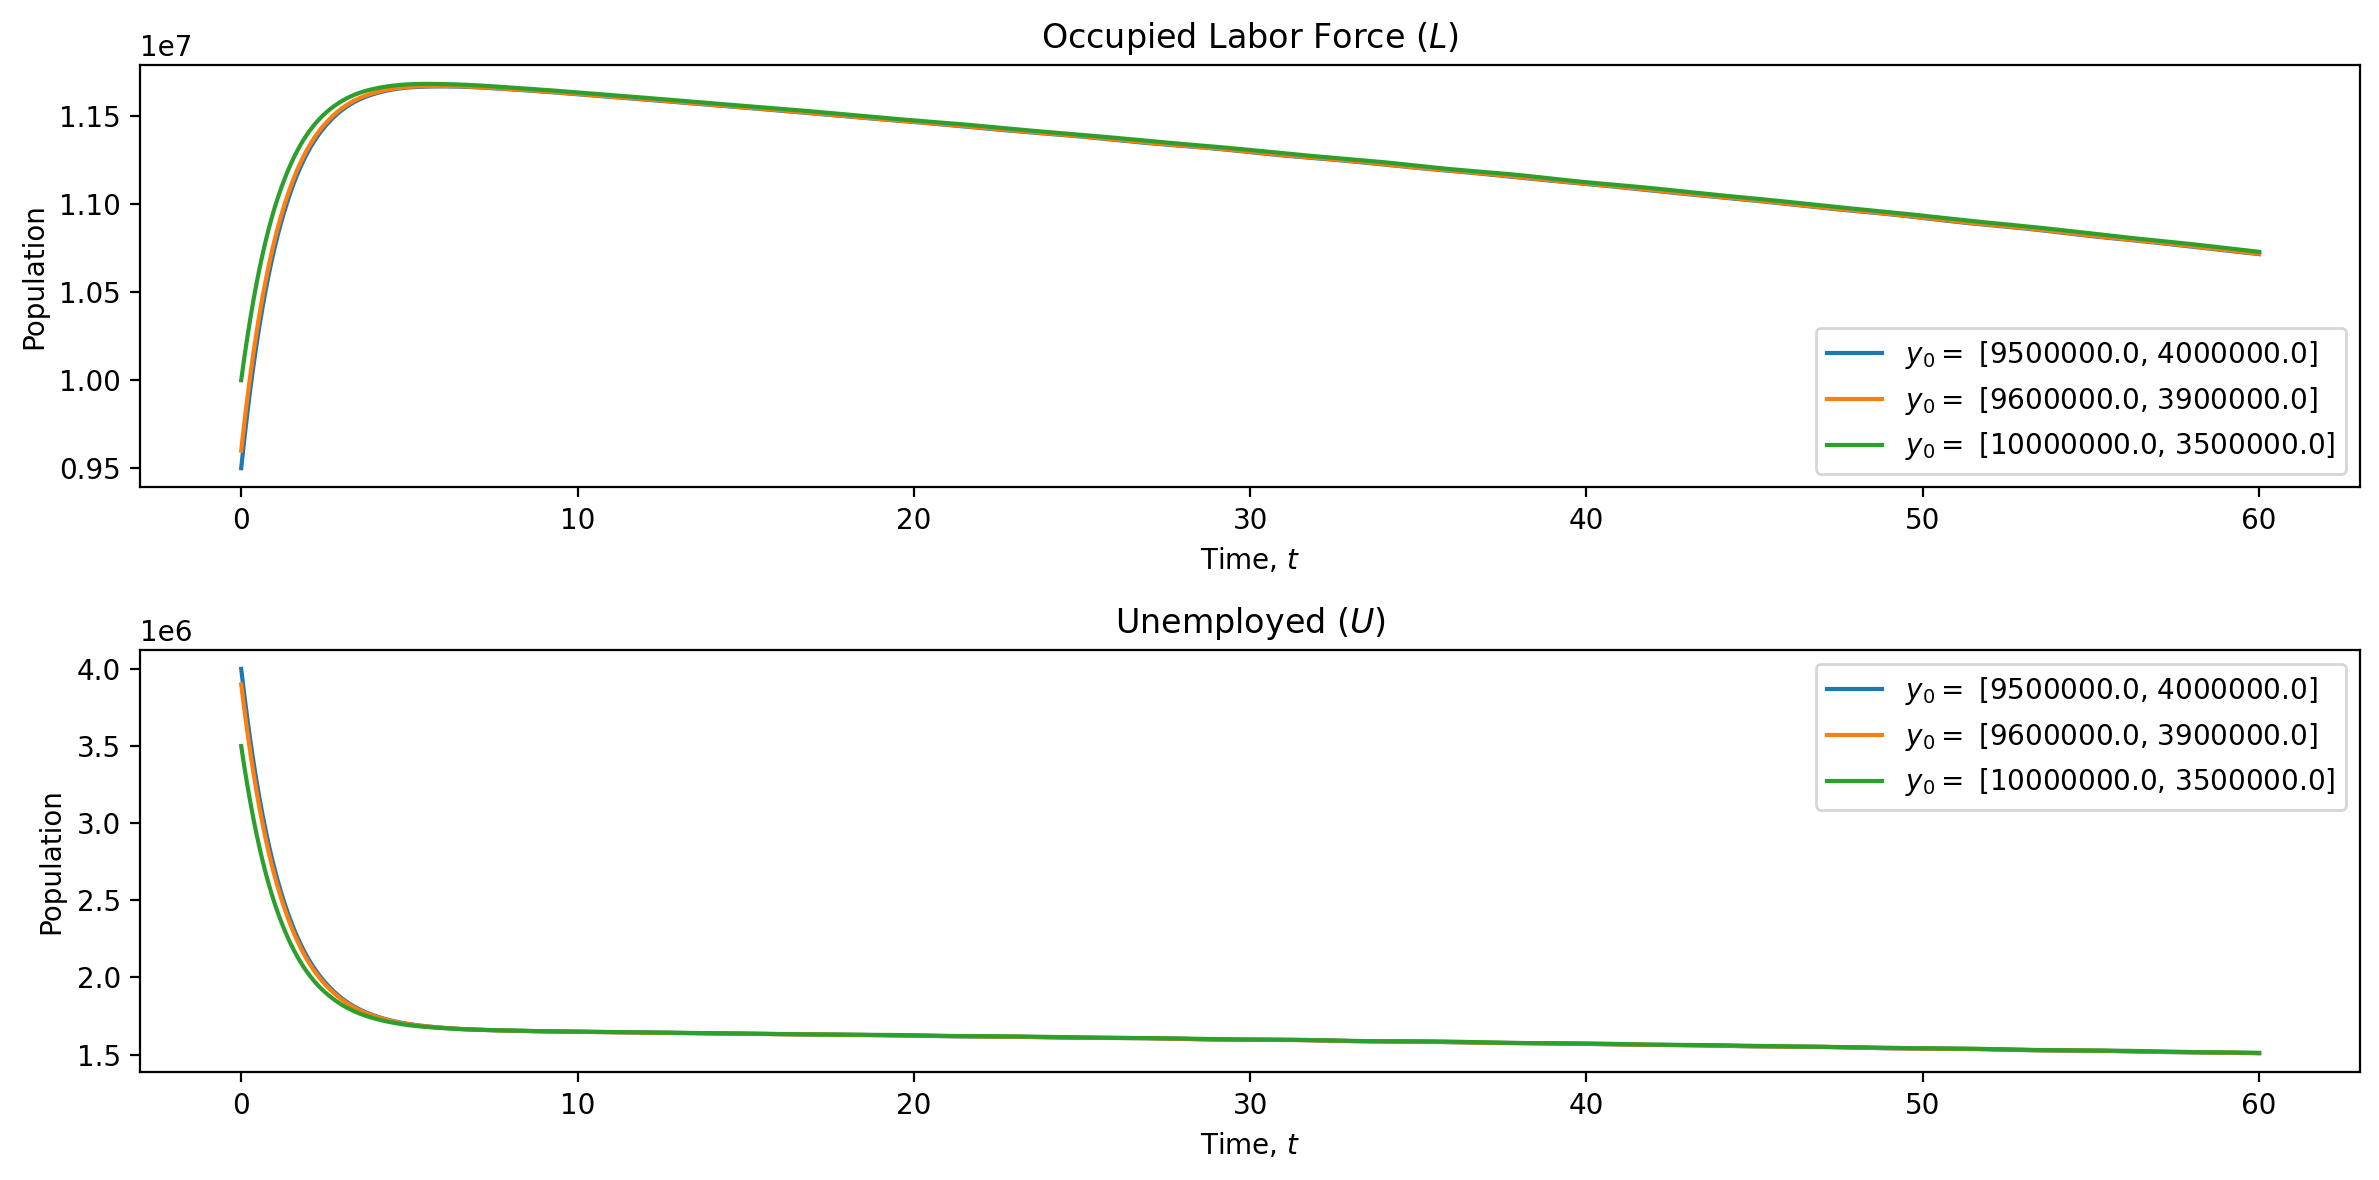

In [2]:
# Figure 1
sigma, rho, tau, gamma, mu = 0.1, 0.01054, 25, 0.7, 0.000481
N_c = 11000000

def f(t, y, sigma, rho, tau, gamma, mu, N_c):
    # Build and return the model
    # L' = gamma * U(t) - (sigma + mu) * L(t)
    # U' = rho * (1 - (L(t) - U(t)) / N_c) * L(t) + sigma L(t) - (mu + gamma) * U(t)
    return (gamma * y[1] - (sigma + mu) * y[0], 
            rho * (-1 + (y[0] - y[1]) / N_c) * y[0] + sigma * y[0] - (mu + gamma) * y[1])

# plt.figure(figsize=(12,6),dpi=100)
fig, ax = plt.subplots(2, 1, figsize=(12,6), dpi=200)
# Initialize variables used for problem.
y0 = np.array([0.1, 0.2])
t = np.linspace(0, 60, 10000)

# Plug these values into solve_ivp
for y0 in [[9.5e6, 4e6], [9.6e6, 3.9e6], [10e6, 3.5e6]]:
    solution = solve_ivp(f, (0, 60), y0, t_eval=t, args=(sigma, rho, tau, gamma, mu, N_c))

    # Get the number of rabbits and wolves
    labor_force = solution.y[0, :]
    ax[0].plot(solution.t, labor_force, label=f'$y_0 = $ {y0}')
    ax[0].set_title(f'Occupied Labor Force ($L$)')
    ax[0].set_xlabel('Time, $t$')
    ax[0].set_ylabel('Population')
    ax[0].legend()

    unemployed = solution.y[1, :]
    ax[1].plot(solution.t, unemployed, label=f'$y_0 = $ {y0}')
    ax[1].set_title(f'Unemployed ($U$)')
    ax[1].set_xlabel('Time, $t$')
    ax[1].set_ylabel('Population')
    ax[1].legend()

plt.tight_layout()
plt.show()

<h1>Me and Ethan's Next Task!</h1>

Modify the paper to include a retirement group (and other parameters that are hithertoo, unknown).

Original Equations:

\begin{align*}
    \frac{dL}{dt} &= \gamma U - (\sigma + \mu)L,\\
    \frac{dU}{dt} &= \rho\left(1 - \frac{L_{\tau} + U_{\tau}}{N_c} \right)L_{\tau} + \sigma L -(\mu + \gamma)U  \\

\end{align*}

We want to modify these equations to include retirement. We can call the retirement group $R$. Our new equations will look something like this:

\begin{align*}
    \frac{dL}{dt} &= \gamma U - (\sigma + \mu)L {\color{red}\;- \left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right) L + \omega\left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right) R},\\
    \frac{dU}{dt} &= \rho\left(1 - \frac{L_{\tau} + U_{\tau}}{N_c} \right)L_{\tau} + \sigma L -(\mu + \gamma)U  \\
    \frac{dR}{dt} &= {\color{red}\left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right) L - \omega\left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right) R \; - \, \mu R}
\end{align*}

Simplifying, we get:

\begin{align*}
    \frac{dL}{dt} &= \gamma U - (\sigma + \mu)L {\color{red}\; + (\omega R - L)\left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right)},\\
    \frac{dU}{dt} &= \rho\left(1 - \frac{L_{\tau} + U_{\tau}}{N_c} \right)L_{\tau} + \sigma L -(\mu + \gamma)U  \\
    \frac{dR}{dt} &= {\color{red}(L - \omega R)\left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right) \; - \, \mu R}
\end{align*}

Of course, we will need to modify $\frac{dL}{dt}$ and $\frac{dU}{dt}$ to account for the retirement group. We will also need to modify the initial conditions to account for the retirement group.

Looking at [this link](https://www.ssa.gov/oact/STATS/OASDIbenies.html), we can find the number of people who retire each year in the United States by looking at the increase in social security use each year.

Social Security provides more than just retirement benefits, however. *[source](https://www.ssa.gov/news/press/factsheets/basicfact-alt.pdf)
- Retired workers and their dependents accounted for 76.9% of total benefits paid in 2022.
- Disabled workers and their dependents accounted for 11.6% of total benefits paid in 2022.
    - About 90 percent of workers aged 21-64 in covered employment in 2022 and their families have protection in the event of a severe and prolonged disability.
    - About 1 in 4 of today’s 20 year-olds will become disabled and entitled to Social Security disabled worker benefits before reaching age 67.
    - 65% of the private sector workforce has no long-term disability insurance.
- Survivors of deceased workers accounted for 11.5% of total benefits paid in 2022.
    - More than one in eight of today’s 20-year-olds will die before reaching age 67. 

For our model, we will consider all people on social security as retired from the work force.

It is also important to consider however, that many people who retire from the work force, return to the work force. This is especially true for people who retire early. According to [BankRate](https://www.bankrate.com/retirement/american-are-considering-returning-to-work/#older-americans-are-re-entering-the-workforce "People who leave retirement to go back to work"), 2.1 percent left retirement to go back to work in June 2020, and 3.2 percent returned back to work in March 2022. This increase makes sense given the pandemic. 

<strong>More helpful, however,</strong> is this article from the [NIH's National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4004604/#:~:text=Rows%202%20and%203%20show,then%20resumed%20full%2Dtime%20work. "National Library of Medicine") that states 12.9% of people who fully retire return to full-time work, and 6.3% of people who fully retire return to part-time work. This is a much more reasonable number to use in our model. Additionally, while our model is considering the labor force, unemployed, and retired, we will group these statistics together (i.e., we are considering the labor force to be people who are both full- and part-time). Thus, on average, 19.2% of people who retire return to the labor force. This is $\omega$. (It is important to note that the above source breaks retired people into full retirement and partial retirement. People who are fully retired had a clear final day of work. Partially retired people do not and instead phase out. Since partially retired people are still <i>technically</i> working, we consider them in the labor force.)



<h2>Documenting our Equation Changes</h2>

- $\Sigma$: The number of people who retire each year in the United States. We calculate this number from data from this website from [the Social Security Administration](https://www.ssa.gov/oact/STATS/OASDIbenies.html 'Social Security Administration'), looking at the years 2000 - present. The formula for this is:
\begin{align*}
    \Sigma = \frac{1}{2021 - 2001}\sum_{i=2001}^{2021}x_i - x_{i-1}
\end{align*}

   where $x_i$ is the number of people on social security for a given year $i$. This number is $775,045$.
   
   - In our equation, we have $\left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right)$. This is the number of people who retire each year in the United States divided by the number of people who are in the labor force and are unemployed.

- $\omega$: This is the rate at which retired people enter back into the full-time work force. According to [sources](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4004604/#:~:text=Rows%202%20and%203%20show,then%20resumed%20full%2Dtime%20work.), this number is 6.3% or $0.063$.

- $\omega \left(\frac{\Sigma}{L_{\tau} + U_{\tau}}\right)L$: This is the number of retired people who enter back into the work force. We calculated it this way because we believe that people who recently retired are the ones most likely to go back to work. We subtract it from $dR/dt$ because those are people no longer classified as retired, and add it to $dL/dt$ because those are people who are now classified as part of the labor force.

- $\mu R$: This is the number of people in the retired group who die. We subtract it from $dR/dt$ because those are people no longer classified as retired. We add it no where because we are not keeping track of the dead.

In [128]:
L, U, R = 157e6, 6.5e6, 48.59e6
omega = 0.192
(Sigma/(L+U))*L, omega*R, Sigma

(744232.8134556576, 9329280.0, 775045)

In [68]:
# Calculate the retirement rate
social_security_data = pd.read_html('https://www.ssa.gov/oact/STATS/OASDIbenies.html')[2]
total_by_year = social_security_data.Total.iloc[3:55].astype(float)

total_by_year['diff'] = total_by_year.diff()
total_by_year.index = social_security_data.Year.iloc[3:55].astype(int)['Year']
retirement_rate = total_by_year['diff'].iloc[-20:].mean()
#total_by_year['diff'].iloc[1:].plot.bar(figsize=(12,6), title='Change in Social Security Benefits by Year')
print('Retirement Rate per year (Σ):', retirement_rate)
print('Average of the last 20 years')
print(total_by_year['diff'].mean())

Retirement Rate per year (Σ): 967538.65
Average of the last 20 years
775045.3725490196


<h1>Changing Previous Hyperparameters to Represent United States</h1>

For our model, we will use the following hyperparameters: $\sigma, \rho, \tau, \gamma, \mu, N_c, \Sigma, \omega$.

For our values, we will consider the following:
- $\sigma = 0.013905$ 
- $\rho = 0.014577$ 
- $\tau = 25$ years 
- $\gamma = 0.6062$  *[source]('https://www.bls.gov/cps/cpsaat01.pdf')
- $\mu = 0.008498$ 
- $N_c = 260000000$
- $\Sigma = 775045$
- $\omega = 0.192$

<h2>How we calculated each</h2>

- $\sigma$: We found this [website]('https://fred.stlouisfed.org/series/JTSLDR#0') which outlined the total layoffs and discharges in the United States, by month, between 2000-2023 (present month). We calculated the average and got $0.013905$.
- $\rho$: We looked at an Excel spreadsheet from this [website]('https://www.macrotrends.net/countries/USA/united-states/population-growth-rate'). We got the growth rate from 2000 - 2022 and averaged those numbers. However, since this is the <b>maximum</b> growth rate and not the average, we included three standard deviations. This number is $0.014577$.
- $\gamma$: We looked at this [pdf]('https://www.bls.gov/cps/cpsaat01.pdf') from the Bureau of Labor Statistics. We simply calculated the average of the employment rate from 2000 - 2022. This number is $0.6062$.
- $\mu$: We looked at this [website]('https://usafacts.org/data/topics/people-society/health/longevity/mortality-rate/'). We simply calculated the average deaths per 100,000 people from 2000 - 2022, then divided by 100k to get the mortality rate. This number is $0.008498$.
- $N_c$: We calculate this to be the population of people 18+ in the United States in 2022. This number is $260000000$. (Got this number [here]('https://datacenter.aecf.org/data/tables/99-total-population-by-child-and-adult-populations#detailed/1/any/false/1095,2048,574,1729,37,871,870,573,869,36/39,40,41/416,417').)
- $\Sigma$: (see above work.)
- $\omega$: (see above work.)

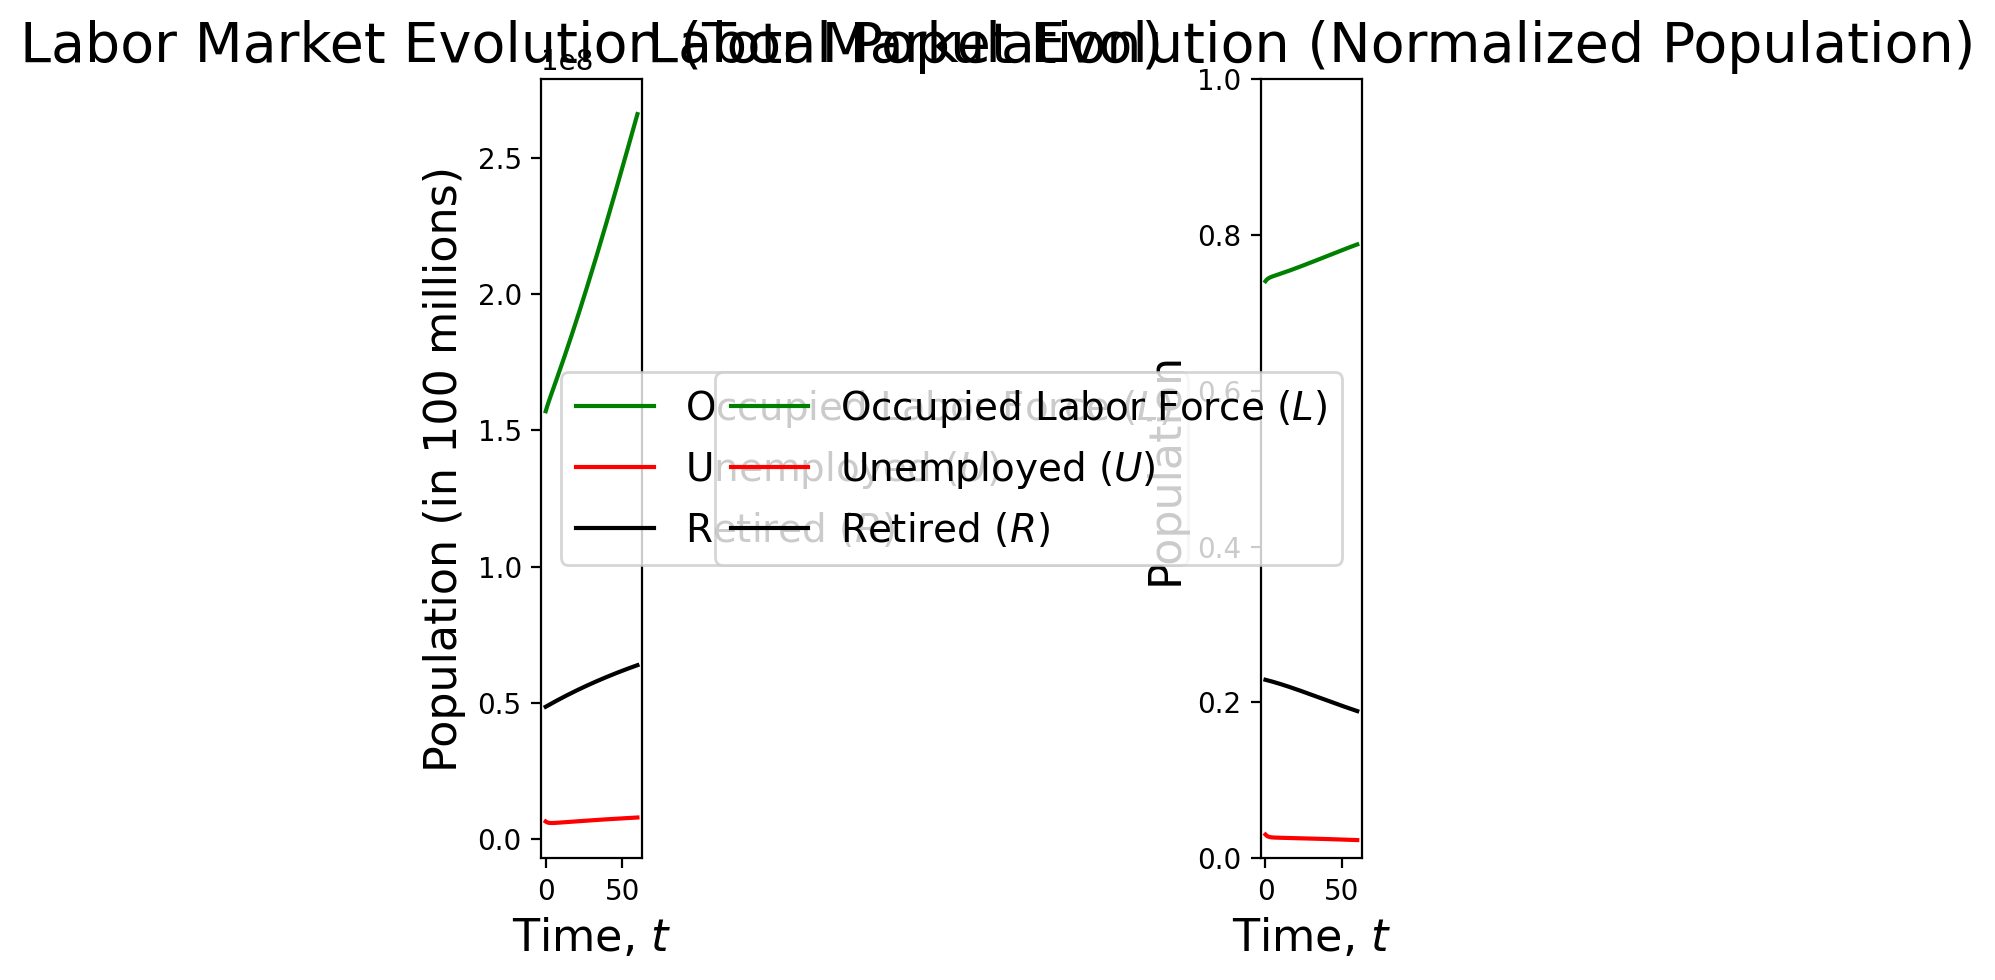

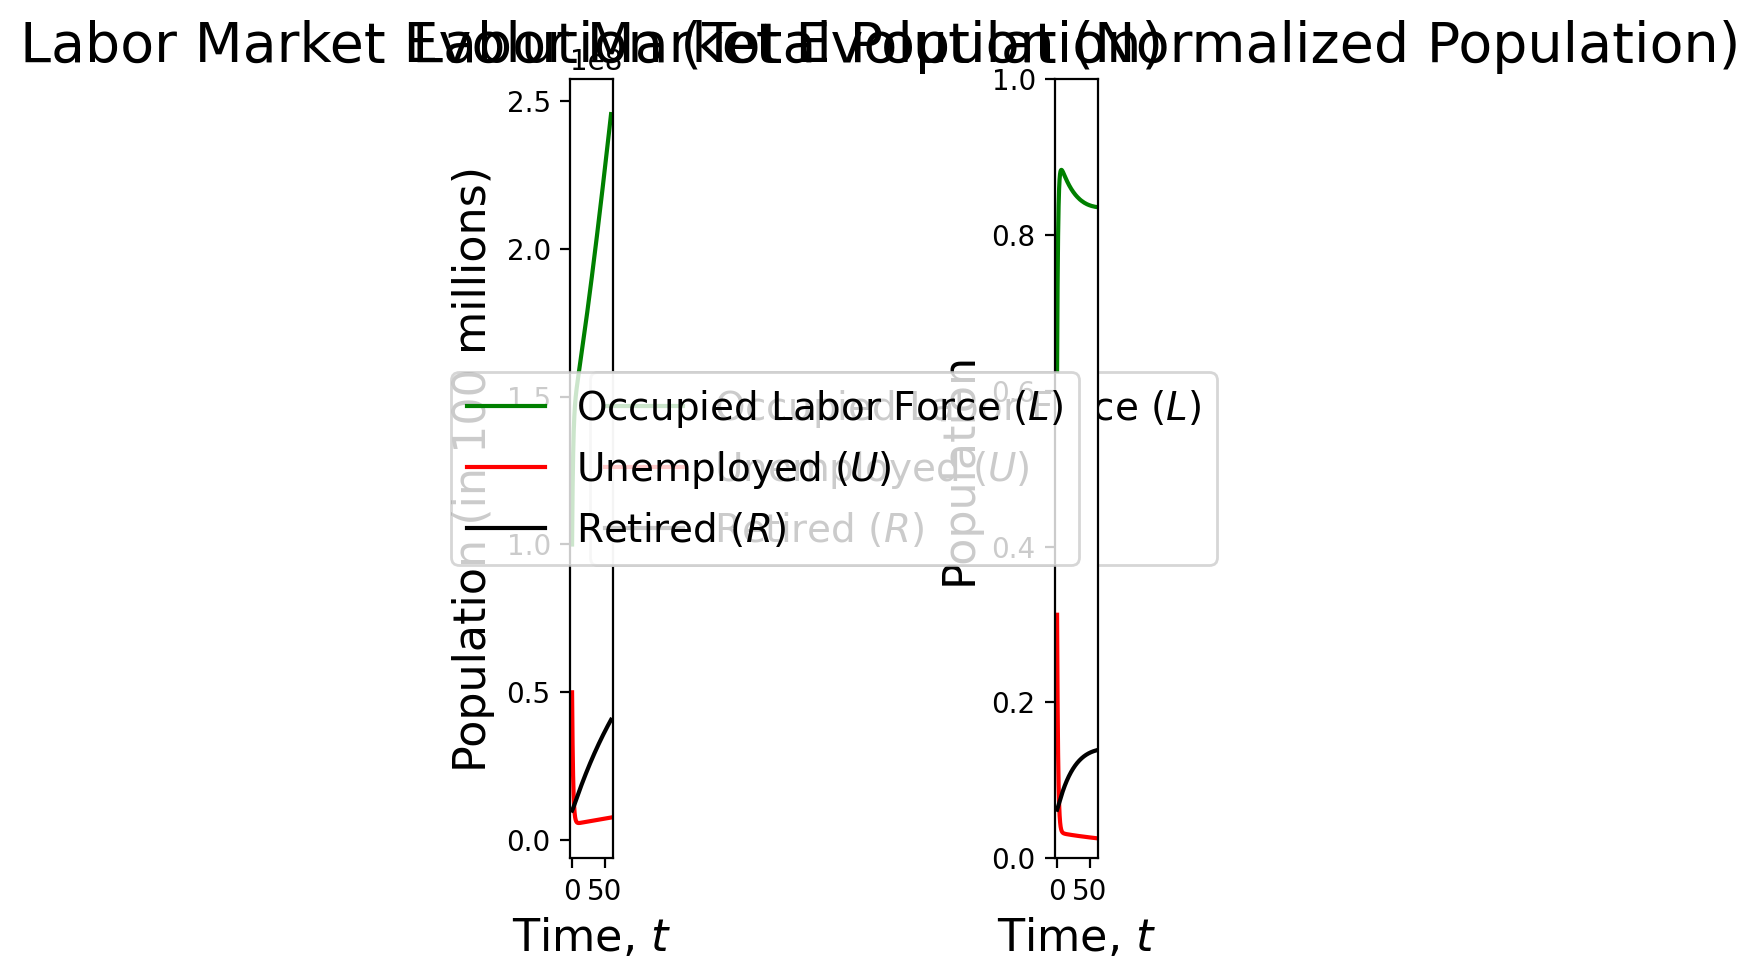

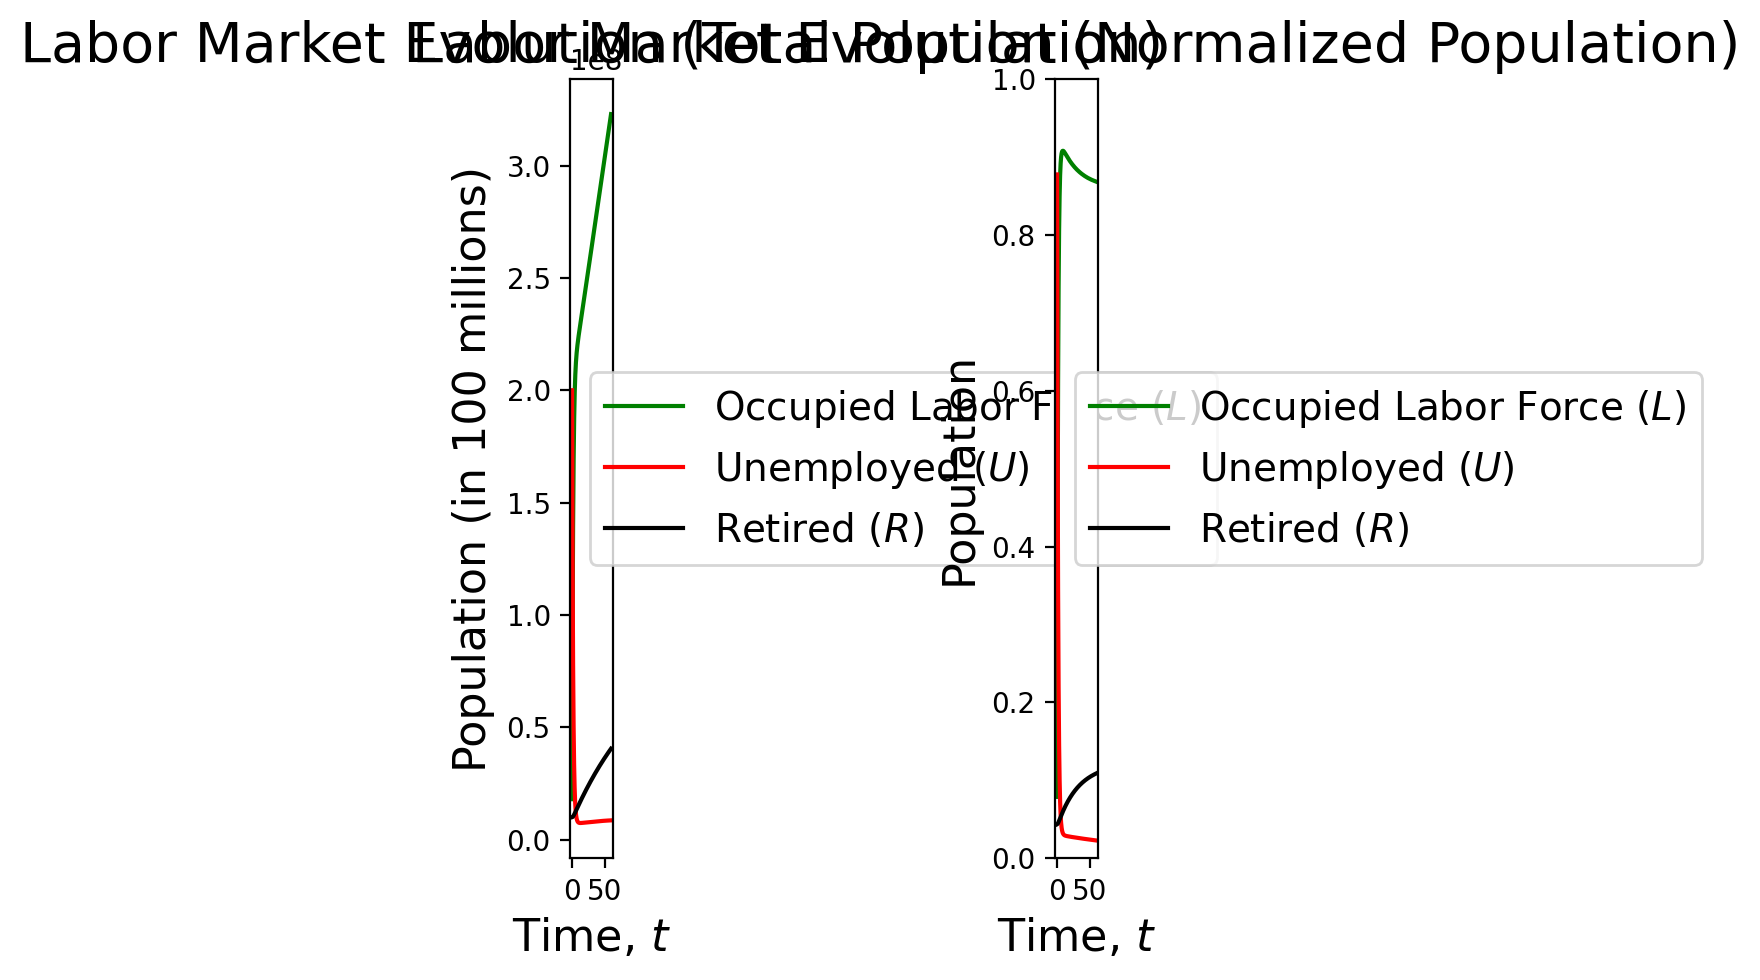

In [200]:
# Trying to graph our above stuff.
sigma, rho, tau, gamma, mu, Sigma, omega = 0.013905, 0.014577, 25, 0.6062, 0.008498, 775045, 0.063
# sigma, rho, tau, gamma, mu, Sigma, omega = 0.013905, 0.014577, 25, 0.6062, 0.008498, 775045, 0.063
# N_c = 2.6e8
N_c = 4e8

def f(t, y, sigma, rho, tau, gamma, mu, N_c, Sigma, omega):
    # Build and return the model
    # L' = gamma * U(t) - (sigma + mu) * L(t) - (Sigma/(L(t)+U(t))) * L(t) + omega * R(t)
    # U' = rho * (1 - (L(t) - U(t)) / N_c) * L(t) + sigma L(t) - (mu + gamma) * U(t)
    # R' = (Sigma/(L(t)+U(t))) * L(t) - omega * R(t) - mu * R(t)
    # return (gamma * y[1] - (sigma + mu) * y[0] - (Sigma / (y[0] + y[1])) * y[0] + omega * y[2] + rho*y[0], 
    return (gamma * y[1] - (sigma + mu) * y[0] - (Sigma / (y[0] + y[1])) * y[0] + omega * (Sigma / (y[0] + y[1])) * y[2] + rho*y[0], 
            rho * (1 - (y[0] + y[1]) / N_c) * y[0] + sigma * y[0] - (mu + gamma) * y[1],
            # (Sigma / (y[0] + y[1])) * y[0] - omega * y[2] - mu * y[2])
            (Sigma / (y[0] + y[1])) * y[0] - omega * (Sigma / (y[0] + y[1])) * y[2] - mu * y[2])

# plt.figure(figsize=(12,6),dpi=100)
# fig, ax = plt.subplots(2, 1, figsize=(12,10), dpi=200)

# Initialize variables used for problem.
T = 60
t = np.linspace(0, T, 1000)

# Plug these values into solve_ivp
# for i, y0 in enumerate([[157e6, 6.5e6, 48.59e6], [157.1e6, 1e6, 1e6], [156.5e6, 6e6, 48e6]]):
for i, y0 in enumerate([[157e6, 6.5e6, 48.59e6], [100e6, 50e6, 10e6], [18e6, 200e6, 10e6]]):
    # fig, ax = plt.subplots(2, 1, figsize=(8,10), dpi=200)
    fig, ax = plt.subplots(1, 2, figsize=(5,5), dpi=200)
    solution = solve_ivp(f, (0, T), y0, t_eval=t, args=(sigma, rho, tau, gamma, mu, N_c, Sigma, omega))

    # # Get the number of rabbits and wolves
    # labor_force = solution.y[0, :]
    # ax[0].plot(solution.t, labor_force, label=f'$y_0 = $ {y0}')
    # ax[0].set_title(f'Occupied Labor Force ($L$)')
    # ax[0].set_xlabel('Time, $t$')
    # ax[0].set_ylabel('Population')
    # ax[0].legend()

    # unemployed = solution.y[1, :]
    # ax[1].plot(solution.t, unemployed, label=f'$y_0 = $ {y0}')
    # ax[1].set_title(f'Unemployed ($U$)')
    # ax[1].set_xlabel('Time, $t$')
    # ax[1].set_ylabel('Population')
    # ax[1].legend()

    # retired = solution.y[2, :]
    # ax[2].plot(solution.t, retired, label=f'$y_0 = $ {y0}')
    # ax[2].set_title(f'Retired ($R$)')
    # ax[2].set_xlabel('Time, $t$')
    # ax[2].set_ylabel('Population')
    # ax[2].legend()
    sum_people = np.sum(solution.y, axis=0)

    ax[0].plot(solution.t, solution.y[0, :], label=f'Occupied Labor Force ($L$)', color='green')
    ax[0].plot(solution.t, solution.y[1, :], label=f'Unemployed ($U$)', color='red')
    ax[0].plot(solution.t, solution.y[2, :], label=f'Retired ($R$)', color='black')
    ax[0].set_title(f'Labor Market Evolution (Total Population)', fontsize=20)
    ax[0].set_xlabel('Time, $t$', fontsize=16)
    ax[0].set_ylabel('Population (in 100 millions)', fontsize=16)
    # ax[i].set_ylim(0, 1)
    ax[0].legend(fontsize=14)

    ax[1].plot(solution.t, solution.y[0, :]/sum_people, label=f'Occupied Labor Force ($L$)', color='green')
    ax[1].plot(solution.t, solution.y[1, :]/sum_people, label=f'Unemployed ($U$)', color='red')
    ax[1].plot(solution.t, solution.y[2, :]/sum_people, label=f'Retired ($R$)', color='black')
    # ax[1].set_title(f'Population Model, Initial Conditions: {numerize(y0[0])}, {numerize(y0[1])}, {numerize(y0[2])}')
    ax[1].set_title(f'Labor Market Evolution (Normalized Population)', fontsize=20)
    ax[1].set_xlabel('Time, $t$', fontsize=16)
    ax[1].set_ylabel('Population', fontsize=16)
    ax[1].set_ylim(0, 1)
    ax[1].legend(fontsize=14)
    plt.tight_layout()
    plt.show()
    # print('Done with iteration', i)


# plt.tight_layout()
# plt.show()

<h1>Visualize Using 3D</h1>

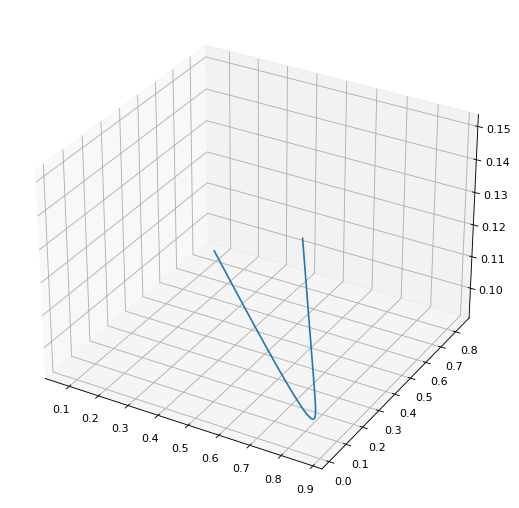

In [156]:
y0 = [18e6, 200e6, 22e6]
solution = solve_ivp(f, t_span=(0, 60), y0=y0, t_eval=t, max_step=0.001, args=(sigma, rho, tau, gamma, mu, N_c, Sigma, omega))
fig = plt.figure(figsize=(25,8),dpi=80)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(solution.y[0,:]/sum_people, solution.y[1,:]/sum_people, solution.y[2,:]/sum_people)
plt.show()